In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# IMPORT DATA

In [3]:
df = pd.read_csv('creditcard.csv')

**DISPLAY**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
legit_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

In [8]:
legit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


**MISSING VALUE**

In [31]:
print('Missing value')
total = df.isnull().sum()
total

Missing value


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**UNDER SAMPLING**

In [12]:
legit_sample = legit_df.sample(n=492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11857,20382.0,1.127804,0.421407,0.088182,1.377698,0.075202,-0.859667,0.437623,-0.322759,0.999347,...,-0.073270,0.019484,-0.101409,0.345330,0.691003,-0.329165,-0.027094,0.011702,45.98,0
23016,32545.0,1.193089,-0.233935,0.564766,-0.211253,-0.680872,-0.270400,-0.485049,0.201288,0.353571,...,-0.070551,-0.266166,0.129661,0.027866,-0.035542,0.922087,-0.067848,-0.007152,3.76,0
131220,79523.0,1.225052,0.321853,0.753001,0.738205,-0.672435,-1.280520,0.123077,-0.282193,-0.105077,...,-0.214319,-0.584308,0.194129,0.933166,0.172081,0.059135,-0.023279,0.025878,0.89,0
239007,149915.0,1.497317,-0.692430,1.081819,4.180581,-0.940157,1.931587,-1.314069,0.611127,0.703989,...,0.194846,0.731762,-0.001785,-0.460493,-0.314717,0.078903,0.061742,-0.009041,138.05,0
194155,130461.0,-0.117385,0.981625,-0.136933,-0.813768,0.663206,-0.729003,0.933616,-0.106905,0.306454,...,-0.349161,-0.790067,-0.006610,-0.746404,-0.362495,0.191988,0.347631,0.147674,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138018,82446.0,1.291942,-0.781376,0.947824,-0.597038,-1.535745,-0.707095,-0.956574,-0.084743,-0.428636,...,0.409131,1.047455,-0.142647,0.442815,0.418003,-0.054553,0.030510,0.033752,54.95,0
7216,9482.0,-0.905585,0.521218,1.769901,0.184901,0.324440,0.266260,0.420348,-0.187486,1.871204,...,-0.158001,0.369929,-0.279657,-0.544873,0.080970,0.450542,0.279466,0.077345,69.99,0
48411,43630.0,1.169159,-0.507848,0.928759,0.642637,-1.229876,-0.296822,-0.721229,0.061900,-0.704723,...,-0.138178,0.032326,0.027627,0.357920,0.282969,-0.242727,0.072961,0.041238,46.38,0
116281,74214.0,-2.146939,1.298729,2.932807,-0.574379,-0.214510,0.222998,1.316622,-1.572321,1.579746,...,-0.907981,-0.104948,-0.340103,0.316901,0.176825,-0.501043,-0.523241,-0.952990,25.44,0


In [13]:
new_df = pd.concat([legit_sample, fraud_df], axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11857,20382.0,1.127804,0.421407,0.088182,1.377698,0.075202,-0.859667,0.437623,-0.322759,0.999347,...,-0.073270,0.019484,-0.101409,0.345330,0.691003,-0.329165,-0.027094,0.011702,45.98,0
23016,32545.0,1.193089,-0.233935,0.564766,-0.211253,-0.680872,-0.270400,-0.485049,0.201288,0.353571,...,-0.070551,-0.266166,0.129661,0.027866,-0.035542,0.922087,-0.067848,-0.007152,3.76,0
131220,79523.0,1.225052,0.321853,0.753001,0.738205,-0.672435,-1.280520,0.123077,-0.282193,-0.105077,...,-0.214319,-0.584308,0.194129,0.933166,0.172081,0.059135,-0.023279,0.025878,0.89,0
239007,149915.0,1.497317,-0.692430,1.081819,4.180581,-0.940157,1.931587,-1.314069,0.611127,0.703989,...,0.194846,0.731762,-0.001785,-0.460493,-0.314717,0.078903,0.061742,-0.009041,138.05,0
194155,130461.0,-0.117385,0.981625,-0.136933,-0.813768,0.663206,-0.729003,0.933616,-0.106905,0.306454,...,-0.349161,-0.790067,-0.006610,-0.746404,-0.362495,0.191988,0.347631,0.147674,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
print(f"new_df Class value_counts : {new_df['Class'].value_counts()}")

new_df Class value_counts : Class
0    492
1    492
Name: count, dtype: int64


# ANALYSIS

# MODELLING

**train_test_split**

In [15]:
X = new_df.drop(['Class'], axis = 1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**set up model**

Logistic Regression: เป็นโมเดลพื้นฐานที่นิยมใช้ในการจำแนกประเภท โดยใช้สำหรับการพยากรณ์ความน่าจะเป็นของเหตุการณ์ต่างๆ

Decision Trees: ใช้การแบ่งแยกข้อมูลตามเกณฑ์ต่างๆ เพื่อสร้างต้นไม้ที่ช่วยในการตัดสินใจ

Random Forest: เป็นการรวมกันของหลาย ๆ ต้นไม้การตัดสินใจเพื่อปรับปรุงความแม่นยำและลดการโอเวอร์ฟิตติ้ง

Gradient Boosting Machines (GBM): ใช้ในการสร้างชุดของโมเดลทำนายที่รวมกันเพื่อปรับปรุงความแม่นยำ

Support Vector Machines (SVM): ใช้เส้นแยกเพื่อแบ่งกลุ่มข้อมูลที่ซับซ้อน

In [16]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)

model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train, y_train)

model_XGB = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# MODEL EVALUATION

**ACCURACY AND ROC_AUC SCORE LOGISTIC REGRESSION**

In [17]:
prediction_test_LR = model_LR.predict(X_test)
prediction_test_LR_roc_auc = model_LR.predict_proba(X_test)

In [18]:
accuracy_LR = accuracy_score(y_test, prediction_test_LR)
roc_auc_LR = roc_auc_score(y_test, prediction_test_LR_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy LOGISTIC REGRESSION: {accuracy_LR * 100:.2f}%')
print(f'ROC AUC Score LOGISTIC REGRESSION: {roc_auc_LR:.2f}')

Accuracy LOGISTIC REGRESSION: 94.42%
ROC AUC Score LOGISTIC REGRESSION: 0.98


**CONFUSION MATRIX AND CLASSIFICATION REPORT LOGISTIC REGRESSION**

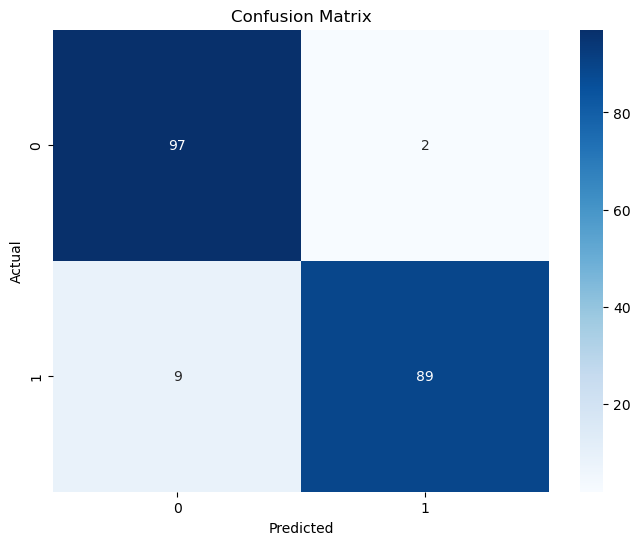

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.91      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [19]:
# Confusion matrix
conf_matrix_LR = confusion_matrix(y_test, prediction_test_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_LR)
print('Classification Report:')
print(class_report)

**ACCURACY DECISION TREE CLASSIFIER**

In [20]:
prediction_test_DTC = model_DTC.predict(X_test)
prediction_test_DTC_roc_auc = model_DTC.predict_proba(X_test)

In [21]:
accuracy_DTC = accuracy_score(y_test, prediction_test_DTC)
roc_auc_DTC = roc_auc_score(y_test, prediction_test_DTC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy DECISION TREE CLASSIFIER: {accuracy_DTC * 100:.2f}%')
print(f'ROC AUC Score DECISION TREE CLASSIFIER: {roc_auc_DTC:.2f}')

Accuracy DECISION TREE CLASSIFIER: 87.82%
ROC AUC Score DECISION TREE CLASSIFIER: 0.88


**CONFUSION MATRIX AND CLASSIFICATION REPORT DECISION TREE CLASSIFIER**

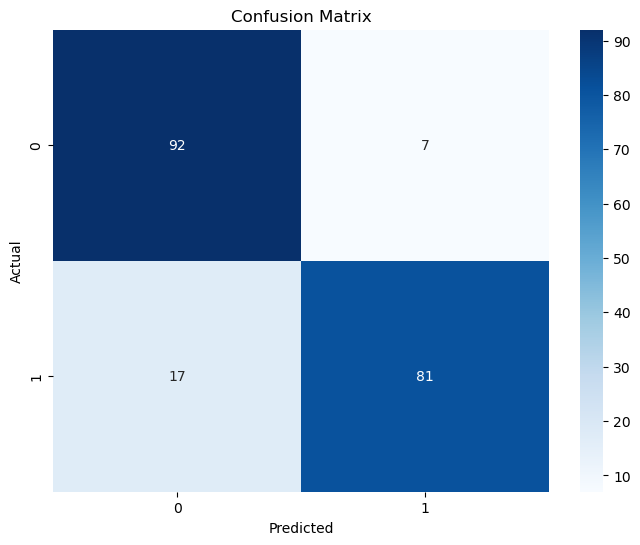

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        99
           1       0.92      0.83      0.87        98

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



In [22]:
# Confusion matrix
conf_matrix_DTC = confusion_matrix(y_test, prediction_test_DTC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_DTC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_DTC)
print('Classification Report:')
print(class_report)

**ACCURACY RANDOM FOREST CLASSIFIER**

In [23]:
prediction_test_RFC = model_RFC.predict(X_test)
prediction_test_RFC_roc_auc = model_RFC.predict_proba(X_test)

In [24]:
accuracy_RFC = accuracy_score(y_test, prediction_test_RFC)
roc_auc_RFC = roc_auc_score(y_test, prediction_test_RFC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy RANDOM FOREST CLASSIFIER: {accuracy_RFC * 100:.2f}%')
print(f'ROC AUC Score RANDOM FOREST CLASSIFIER: {roc_auc_RFC:.2f}')

Accuracy RANDOM FOREST CLASSIFIER: 93.40%
ROC AUC Score RANDOM FOREST CLASSIFIER: 0.98


**CONFUSION MATRIX AND CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER**

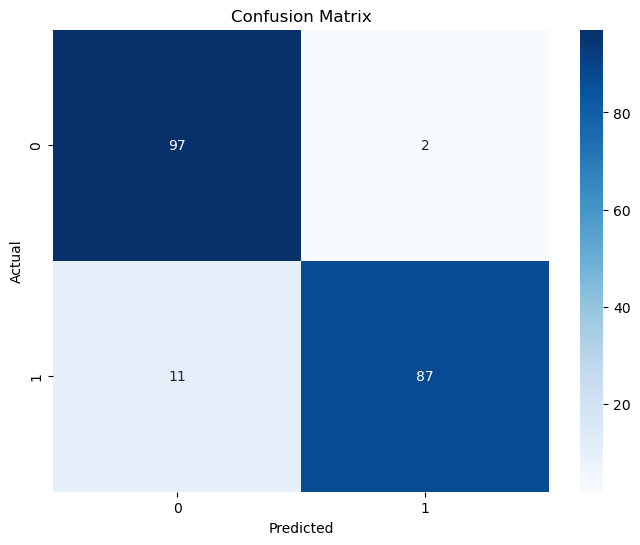

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [25]:
# Confusion matrix
conf_matrix_RFC = confusion_matrix(y_test, prediction_test_RFC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RFC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_RFC)
print('Classification Report:')
print(class_report)

**ACCURACY XGBClassifier**

In [26]:
prediction_test_XGB = model_XGB.predict(X_test)
prediction_test_XGB_roc_auc = model_XGB.predict_proba(X_test)

In [27]:
accuracy_XGB = accuracy_score(y_test, prediction_test_XGB)
roc_auc_XGB = roc_auc_score(y_test, prediction_test_XGB_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy XGBClassifier: {accuracy_XGB * 100:.2f}%')
print(f'ROC AUC Score XGBClassifier: {roc_auc_XGB:.2f}')

Accuracy XGBClassifier: 92.89%
ROC AUC Score XGBClassifier: 0.98


**CONFUSION MATRIX AND CLASSIFICATION REPORT XGBClassifier**

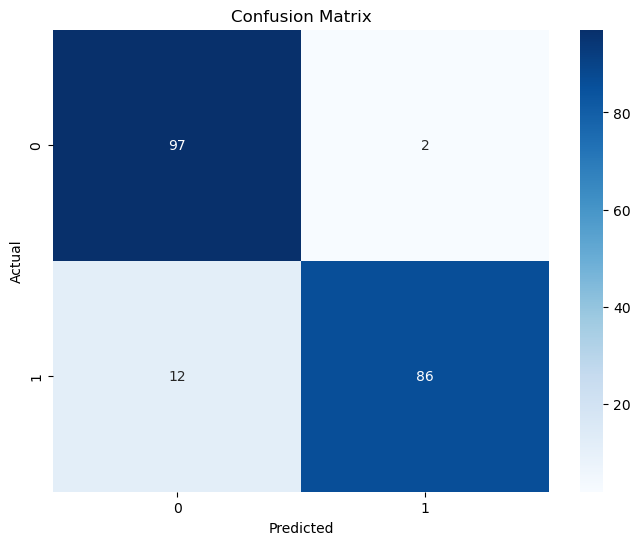

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [28]:
# Confusion matrix
conf_matrix_XGB = confusion_matrix(y_test, prediction_test_XGB)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_XGB)
print('Classification Report:')
print(class_report)